In [ ]:
### NEEDS REWRITE ####
## REMOVE LOOP - find better way to deal with negative Kdry values

def xfrm(vp_1, vs_1, rho_1, rho_f1, k_f1, rho_f2, k_f2, K0, phi_):
    """
    INPUT
    vp1, vs1, rho1: (vector) Measured Vp, Vs and density saturated with fluid 1
    rho_f1, k_f1:   (vector) Density and bulk modulus of fluid 1 (requires Sw)
    rho_f2, k_f2:   (scalar) Density and bulk modulus of fluid 2 (rho_o, k_o, rho_g, k_g, etc)
    k0:             (scalar) mineral bulk modulus - (k_u - k_l)/2
    phi:            (vector) porosity

    RETURN
    vp2, vs2, rho2, k_s2: Vp, Vs, density and bulk modulus of rock with fluid 2.

    Velocities are in m/s and densities in g/cm3.

    USAGE:
    vp1ox, vs1ox, rho1ox, k1ox = frm(vp1, vs1, rho1, RHO_WATER, K_WATER, RHO_GAS, K_GAS, K0, phiex1)
    """
    vp_2 = []
    vs_2 = []
    rho_2 = []
    
    for i in range(0, len(vp_1)):

        # convert Vp,Vs from m/s to km/s for calculation
        vp1 = vp_1[i] / 1000.
        vs1 = vs_1[i] / 1000.
        rho1 = rho_1[i]
        phi = phi_[i]
        k0 = K0[i]

        mu1 = rho1 * vs1 ** 2.
        #rho2 = rho1 - phi * rho_f1 + phi * rho_f2
        rho_2.append(rho1 - phi * rho_f1 + phi * rho_f2)
        mu2 = mu1
        #vs2 = np.sqrt((mu2 / rho2))
        vs_2.append(np.sqrt((mu2 / rho_2)))

        k_s1 = rho1 * vp1 ** 2 - (4. / 3.) * mu1  # mu1 = rho1 * vs1**2    

        # The dry rock bulk modulus
        kdry = (k_s1 * ((phi*k0)/k_f1+1-phi)-k0) / ((phi*k0)/k_f1+(k_s1/k0)-1-phi)

        if kdry > 0:

            # Now we can apply Gassmann to get the new values
            k_s2 = kdry + (1 - (kdry / k0)) ** 2 / ((phi / k_f2) + ((1 - phi) / k0) - (kdry / k0 ** 2))

            #vp2 = np.sqrt(((k_s2 + (4. / 3.) * mu2)) / rho2)    
            vp_2.append(np.sqrt(((k_s2 + (4. / 3.) * mu2)) / rho_2)    )

        else: vp_2.append(vp1)
        
    # return Vp,Vs as m/s
    return vp_2 * 1000, vs_2 * 1000, rho_2

In [ ]:
def frm(vp_1, vs_1, rho_1, rho_f1, k_f1, rho_f2, k_f2, K0, phi_):
    """
    INPUT
    vp1, vs1, rho1: (vector) Measured Vp, Vs and density saturated with fluid 1
    rho_f1, k_f1:   (vector) Density and bulk modulus of fluid 1 (requires Sw)
    rho_f2, k_f2:   (scalar) Density and bulk modulus of fluid 2 (rho_o, k_o, rho_g, k_g, etc)
    k0:             (scalar) mineral bulk modulus - (k_u - k_l)/2
    phi:            (vector) porosity

    RETURN
    vp2, vs2, rho2, k_s2: Vp, Vs, density and bulk modulus of rock with fluid 2.

    Velocities are in m/s and densities in g/cm3.

    USAGE:
    vp1ox, vs1ox, rho1ox, k1ox = frm(vp1, vs1, rho1, RHO_WATER, K_WATER, RHO_GAS, K_GAS, K0, phiex1)
    """

    vp_frm = []
    vs_frm = []
    rho_frm = []

    for i in range(0, len(df.VP)):

        # convert Vp,Vs from m/s to km/s for calculation
        vp1 = df.VP[i] / 1000.
        vs1 = df.VS[i] / 1000.
        rho1 = df.DEN[i]
        phi = df.PHIE[i]
        # k0 = k0[i]

        mu1 = rho1 * vs1 ** 2.
        rho2 = rho1 - phi * rho_f1 + phi * rho_f2
        rho_frm.append(rho2)
        mu2 = mu1
        vs2 = np.sqrt((mu2 / rho2))
        vs_frm.append(vs2*1000)

        k_s1 = rho1 * vp1 ** 2 - (4. / 3.) * mu1  # mu1 = rho1 * vs1**2    

        # The dry rock bulk modulus
        kdry = (k_s1 * ((phi*k0[i])/k_f1+1-phi)-k0[i]) / ((phi*k0[i])/k_f1+(k_s1/k0[i])-1-phi)

        if kdry > 0:  #(0 < kdry < 36):  # idx 446, 447 had kdry 70+  --> why?

            # Now we can apply Gassmann to get the new values
            k_s2 = kdry + (1 - (kdry / k0[i])) ** 2 / ((phi / k_f2) + ((1 - phi) / k0[i]) - (kdry / k0[i] ** 2))

            vp2 = np.sqrt(((k_s2 + (4. / 3.) * mu2)) / rho2)
            # vp_frm.append(np.round(vp2*1000, 0))
            vp_frm.append(int(vp2*1000))

        else:
            vp2 = vp1
            vp_frm.append(vp2*1000)
            
    # return Vp,Vs as m/s
    return vp_frm, vs_frm, rho_frm

In [ ]:
def frm(vp_1, vs_1, rho_1, rho_f1, k_f1, rho_f2, k_f2, K0, phi_):
    """
    INPUT
    vp1, vs1, rho1: (vector) Measured Vp, Vs and density saturated with fluid 1
    rho_f1, k_f1:   (vector) Density and bulk modulus of fluid 1 (requires Sw)
    rho_f2, k_f2:   (scalar) Density and bulk modulus of fluid 2 (rho_o, k_o, rho_g, k_g, etc)
    k0:             (scalar) mineral bulk modulus - (k_u - k_l)/2
    phi:            (vector) porosity

    RETURN
    vp2, vs2, rho2, k_s2: Vp, Vs, density and bulk modulus of rock with fluid 2.

    Velocities are in m/s and densities in g/cm3.

    USAGE:
    vp1ox, vs1ox, rho1ox, k1ox = frm(vp1, vs1, rho1, RHO_WATER, K_WATER, RHO_GAS, K_GAS, K0, phiex1)
    """

    vp_frm = []
    vs_frm = []
    rho_frm = []

    for i in range(0, len(vp_1)):

        # convert Vp,Vs from m/s to km/s for calculation
        vp1 = vp_1[i] / 1000.
        vs1 = vs_1[i] / 1000.
        rho1 = rho_1[i]
        phi = phi_[i]
        k0 = K0[i]

        mu1 = rho1 * vs1 ** 2.
        rho2 = rho1 - phi * rho_f1 + phi * rho_f2
        rho_frm.append(rho2)
        mu2 = mu1
        vs2 = np.sqrt((mu2 / rho2))
        vs_frm.append(vs2*1000)

        k_s1 = rho1 * vp1 ** 2 - (4. / 3.) * mu1  # mu1 = rho1 * vs1**2    

        # The dry rock bulk modulus
        kdry = (k_s1 * ((phi*k0)/k_f1+1-phi)-k0) / ((phi*k0)/k_f1+(k_s1/k0)-1-phi)

        # kdry values were negative when k0=36 was too high -> use vrh()
        # Vp2 values were getting > 6000 when kdry was > 70 (why so high?)
        if (0 < kdry < 36):

            # Now we can apply Gassmann to get the new values
            k_s2 = kdry + (1 - (kdry / k0)) ** 2 / ((phi / k_f2) + ((1 - phi) / k0) - (kdry / k0 ** 2))
            
            if k_s2 > 0:
                
            # print(f"k_s2: {k_s2}")
                vp2 = np.sqrt(((k_s2 + (4. / 3.) * mu2)) / rho2)
                # vp_frm.append(np.round(vp2*1000, 0))
                vp_frm.append(int(vp2*1000))
            else: 
                vp2 = vp1
                vp_frm.append(vp2*1000)

        else:
            vp2 = vp1
            vp_frm.append(vp2*1000)
            
    # return as arrays
    vp_frm = np.array(vp_frm)
    vs_frm = np.array(vs_frm)
    rho_frm = np.array(rho_frm)
    
    return vp_frm, vs_frm, rho_frm, k_s2

In [2]:
def vshale_from_gr(df):
    """
    Creates Clavier, Larionov old, Larionov new, Steiber VSH
    """    
    GR_min = df.GR.min()
    GR_max = df.GR.max()
    df.loc[:, 'IGR'] = (df.GR - GR_min) / (GR_max - GR_min)
    df.loc[:, 'VSH_clavier'] = 1.7 - ((3.38 - (df.IGR + 0.7)**2)**0.5)
    df.loc[:, 'VSH_larionovO'] = 0.33 * (2**(2*df.IGR)-1)
    df.loc[:, 'VSH_steiber'] = df.IGR / (3 - 2*df.IGR)
    df.loc[:, 'VSH_larionovT'] = 0.083*(2**(3.7*df.IGR)-1)
    # Pick one to be "main" VSH
    df['VSH'] = df.VSH_larionovO
    return df

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

C:\Users\Dunbar\AppData\Local\Temp\ipykernel_24812\220519149.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  # or 199


In [3]:
# if at home, os=windows
path = r"C:\Users\Dunbar\Dropbox\Work\WintershallDea\StellaMaris\Python"
#path = '/home/alex/Dropbox/Work/QSI/data'
file = '104-1_continuous.csv'

# loading csv file
cols = ['DEPTH', 'TVD', 'SSTVD', 'Z', 'TWT', 'CALI', 'DEN', 'PEF', 'BS', 'GR', 'NEU', 'ACS', 'AC', 'PHIT', 'PHIE', 'VP',
        'VS', 'Pimp', 'Simp', 'VPVS']
df = pd.read_csv(path + '/' + file, skiprows=2, header=None, na_values=-999.25, names=cols,
                 usecols=['DEPTH', 'TVD', 'SSTVD', 'TWT', 'DEN', 'GR', 'NEU', 'PHIE', 'VP', 'VS', 'Pimp', 'Simp',
                          'VPVS'])

# df["VSH"] = (df.GR - df.GR.min()) / (df.GR.max()-df.GR.min())

df = vshale_from_gr(df)

formations = ["Tau", "Egersund", "Sandnes", "Bryne", "Triassic", "Zechstein"]
depths = [2215, 2245, 2274, 2311, 2348, 2364]
conditions = [
    (df["DEPTH"].ge(depths[0]) & df["DEPTH"].lt(depths[1])),
    (df["DEPTH"].ge(depths[1]) & df["DEPTH"].lt(depths[2])),
    (df["DEPTH"].ge(depths[2]) & df["DEPTH"].lt(depths[3])),
    (df["DEPTH"].ge(depths[3]) & df["DEPTH"].lt(depths[4])),
    (df["DEPTH"].ge(depths[4]) & df["DEPTH"].lt(depths[5])),
    (df["DEPTH"].ge(depths[5]))
]
df["FORMATION"] = np.select(conditions, formations)

# df = df[(df.FORMATION=='Tau') |
#         (df.FORMATION=='Egersund') |
#         (df.FORMATION=='Sandnes') |
#         (df.FORMATION=='Bryne') |
#         (df.FORMATION=='Triassic') ]

reservoir = [0, 1]
depths = [2215, 2274, 2364]
conditions = [
    (df["DEPTH"].ge(depths[0]) & df["DEPTH"].lt(depths[1])),
    (df["DEPTH"].ge(depths[1]) & df["DEPTH"].lt(depths[2])),
    #(df["DEPTH"].ge(depths[2]) & df["DEPTH"].lt(depths[3]))
]
df["RESERVOIR"] = np.select(conditions, reservoir)

#         0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21
depths = [2215,2274,2283,2286,2294,2296,2297,2298,2303,2306,2311,2325,2328,2343,2345,2346,2347,2349,2359,2361,2364]
facies = [0   ,1   ,2   ,1   ,3   ,1   ,2   ,1   ,3   ,1   ,2   ,1   ,2   ,1   ,2   ,1   ,2   ,1   ,2   ,1   ,4]
# print(len(depths), len(facies))

conditions = [
    (df["DEPTH"].ge(depths[0]) & df["DEPTH"].lt(depths[1])),
    (df["DEPTH"].ge(depths[1]) & df["DEPTH"].lt(depths[2])),
    (df["DEPTH"].ge(depths[2]) & df["DEPTH"].lt(depths[3])),
    (df["DEPTH"].ge(depths[3]) & df["DEPTH"].lt(depths[4])),
    (df["DEPTH"].ge(depths[4]) & df["DEPTH"].lt(depths[5])),
    (df["DEPTH"].ge(depths[5]) & df["DEPTH"].lt(depths[6])),    
    (df["DEPTH"].ge(depths[6]) & df["DEPTH"].lt(depths[7])),
    (df["DEPTH"].ge(depths[7]) & df["DEPTH"].lt(depths[8])),
    (df["DEPTH"].ge(depths[8]) & df["DEPTH"].lt(depths[9])),
    (df["DEPTH"].ge(depths[9]) & df["DEPTH"].lt(depths[10])),
    (df["DEPTH"].ge(depths[10]) & df["DEPTH"].lt(depths[11])),
    (df["DEPTH"].ge(depths[11]) & df["DEPTH"].lt(depths[12])),    
    (df["DEPTH"].ge(depths[12]) & df["DEPTH"].lt(depths[13])),
    (df["DEPTH"].ge(depths[13]) & df["DEPTH"].lt(depths[14])),
    (df["DEPTH"].ge(depths[14]) & df["DEPTH"].lt(depths[15])),
    (df["DEPTH"].ge(depths[15]) & df["DEPTH"].lt(depths[16])),
    (df["DEPTH"].ge(depths[16]) & df["DEPTH"].lt(depths[17])),
    (df["DEPTH"].ge(depths[17]) & df["DEPTH"].lt(depths[18])),    
    (df["DEPTH"].ge(depths[18]) & df["DEPTH"].lt(depths[19])),
    (df["DEPTH"].ge(depths[19]) & df["DEPTH"].lt(depths[20])),
    (df["DEPTH"].ge(depths[20]))# & df["DEPTH"].lt(depths[21])),
    #(df["DEPTH"].ge(depths[21]))# & df["DEPTH"].lt(depths[22])),
]

df["FACIES"] = np.select(conditions, facies)

#df = df[df.FORMATION == 'Sandnes']
# df = df[df.FORMATION != '0']
#df = df[(df.RESERVOIR == 1)]

df = df[(df.DEPTH >= 2274) & (df.DEPTH < 2364)]

df = df.reset_index(drop=True)
df.head()

,DEPTH,TVD,SSTVD,TWT,DEN,GR,NEU,PHIE,VP,VS,Pimp,Simp,VPVS,IGR,VSH_clavier,VSH_larionovO,VSH_steiber,VSH_larionovT,VSH,FORMATION,RESERVOIR,FACIES
0,2274.1128,2273.993076,2242.993076,1764.805233,2.4034,125.30,0.3550,0.2287,2674.79,1601.89,6428.73,3850.07,1.67,0.686001,0.492109,0.524138,0.421377,0.399119,0.524138,Sandnes,1,1
1,2274.2652,2274.145466,2243.145466,1764.909962,2.4249,121.16,0.3320,0.2194,2761.48,1715.95,6696.34,4161.03,1.61,0.662366,0.465513,0.496605,0.395379,0.370762,0.496605,Sandnes,1,1
2,2274.4176,2274.297856,2243.297856,1765.014691,2.4835,117.63,0.2432,0.1456,2991.36,1950.33,7428.98,4843.62,1.53,0.642213,0.443630,0.473831,0.374343,0.347905,0.473831,Sandnes,1,1
3,2274.5700,2274.450245,2243.450245,1765.119421,2.5690,111.01,0.1785,0.1036,3374.41,2332.64,8668.70,5992.45,1.45,0.604419,0.404434,0.432799,0.337445,0.308099,0.432799,Sandnes,1,1
4,2274.7224,2274.602635,2243.602635,1765.224150,2.6387,66.18,0.1127,0.0451,3907.80,2518.66,10311.52,6645.98,1.55,0.348481,0.189806,0.204959,0.151314,0.119871,0.204959,Sandnes,1,1


In [ ]:
print(df.isnull().sum())

In [6]:
def vrh(volumes,k,mu):
    f = np.array(volumes).T
    k = np.resize(np.array(k),np.shape(f))
    mu = np.resize(np.array(mu),np.shape(f))

    k_u = np.sum(f*k, axis=1)
    k_l = 1. / np.sum(f/k, axis=1)
    mu_u = np.sum(f*mu, axis=1)
    mu_l = 1. / np.sum(f/mu, axis=1)
    k0 = (k_u+k_l) / 2.
    mu0 = (mu_u+mu_l) / 2.
    return k_u, k_l, mu_u, mu_l, k0, mu0

rho_qz=2.65;  k_qz=37;  mu_qz=44    # mineral properties, quartz (i.e., sands)
rho_sh=2.81;  k_sh=15;  mu_sh=5     # mineral properties, clay (i.e., shales)
rho_b=1.09;   k_b=2.8               # fluid properties, brine
rho_o=0.78;   k_o=0.94              # fluid properties, oil
rho_g=0.25;   k_g=0.06              # fluid properties, gas

# mineral mixture bulk and shear moduli, k0 and mu0
shale = df.VSH.values
sand = 1 - shale - df.PHIE.values
shaleN = shale / (shale+sand)  # normalized shale and sand volumes
sandN  = sand / (shale+sand)
k_u, k_l, mu_u, mu_l, k0, mu0 = vrh([shaleN, sandN], [k_sh, k_qz], [mu_sh, mu_qz])

In [7]:
K0 = k0  # uses VSHALE => is this where the problems starts?
RHO_GAS = 0.7;
K_GAS = 0.133
RHO_WATER = 1.055;
K_WATER = 3.013

vp1 = df.VP#[:10]
vs1 = df.VS#[:10]
rho1 = df.DEN#[:10]
phi = df.PHIE#[:10]


#k0 = k0
k_f1 = K_WATER       # = 3.013
rho_f1 = RHO_WATER   # = 1.055
k_f2 = K_GAS         # = 0.133
rho_f2 = RHO_GAS     # = 0.7

# USE ONE OR OTHER FROM BELOW

In [ ]:
# FRM
vpg, vsg, rhog, _ = frm(df.VP, df.VS, df.DEN, RHO_WATER, K_WATER, RHO_GAS, K_GAS, K0, df.PHIE)

In [ ]:
# XFRM
# vpg, vsg, rhog = frm(df.VP, df.VS, df.DEN, RHO_WATER, K_WATER, RHO_GAS, K_GAS, K0, df.PHIE)

In [ ]:
vpg = np.array(vpg)
vsg = np.array(vsg)
rhog = np.array(rhog)

sand = (df.RESERVOIR == 1)
#shale = (df.RESERVOIR != 1)

df['VP_FRMG'] = df.VP
df['VS_FRMG'] = df.VS
df['RHO_FRMG'] = df.DEN

df['VP_FRMG'][sand] = vpg[sand]
df['VS_FRMG'][sand] = vsg[sand]
df['RHO_FRMG'][sand] = rhog[sand]

df['IP_FRMG'] = df.VP_FRMG*df.RHO_FRMG
df['IS_FRMG'] = df.VS_FRMG*df.RHO_FRMG
df['VPVS_FRMG'] = df.VP_FRMG/df.VS_FRMG

# df = df[df.FORMATION == 'Sandnes']

# df = df.reset_index(drop=True)

#print(df.head([['VP', 'VS', 'DEN']]))

print(df.isnull().sum())

In [ ]:
df[(df.DEPTH > 2282)&(df.DEPTH<2285)][['DEPTH', 'VP', 'DEN', 'Pimp', 'VP_FRMG', 'RHO_FRMG', 'IP_FRMG', 'VPVS_FRMG']]

In [ ]:
import matplotlib.colors as colors
#      0=shale   1=sand  2=interbedded   3=limestone 4=Salt
ccc = ['#1B4F72','#F4D03F','#DC7633','#AED6F1','red']
cmap_facies = colors.ListedColormap(ccc[0:len(ccc)], 'indexed')

tops = {
    "Tau": 2215,
    "Egersund": 2245,
    "Sandnes": 2274,
    "Bryne": 2311,
    "Triassic": 2348,
    "Zechstein":2364,
    #"TD": 2415.2352
}


ztop=2270; zbot=2340
ll=df[(df.DEPTH>=ztop) & (df.DEPTH<=zbot)]

cluster=np.repeat(np.expand_dims(ll['FACIES'].values,1), 100, 1)

f, ax = plt.subplots(nrows=1, ncols=6, figsize=(15, 15))
ax[0].plot(ll.GR, ll.DEPTH, '-k', label='GR')
ax[1].plot(ll.VP, ll.DEPTH, '-r', label='VP')
ax[2].plot(ll.DEN, ll.DEPTH, '-g', label='Density')

ax[3].plot(ll.IP_FRMG, ll.DEPTH, '-r', label='Ip(gas)')
ax[3].plot(ll.Pimp, ll.DEPTH, '-', color='0.5', label='Ip(brine)')

ax[4].plot(ll.VPVS_FRMG, ll.DEPTH, '-r', label='Vp/Vs(gas)')
ax[4].plot(ll.VPVS, ll.DEPTH, '-', color='0.5', label='Vp/Vs(brine)')
im=ax[5].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=0,vmax=4)#4)

cbar=plt.colorbar(im, ax=ax[5], aspect=20)
# cbar.set_label('0=undef,1=brine,2=oil,3=gas,4=shale')
# cbar.set_ticks(range(0,4+1)); cbar.set_ticklabels(range(0,4+1))
cbar.set_label((6*' ').join(['shale', 'sand', 'interbed', 'limestone', 'salt']))#, 'shale']))
cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

for i in range(len(ax)-1):
    ax[i].set_ylim(ztop,zbot)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=4)
#ax[0].legend(fontsize='small', loc='lower right')

ax[0].set_xlabel("GR"),            ax[0].set_xlim(0, 150),     
ax[1].set_xlabel("VP"),            ax[1].set_xlim(2000, 5000), ax[1].set_yticklabels([])
ax[2].set_xlabel("Density"),       ax[2].set_xlim(1.95, 2.95), ax[2].set_yticklabels([])
ax[3].set_xlabel("Ip [m/s*g/cc]"), ax[3].set_xlim(3000,12000), ax[3].set_yticklabels([]), ax[3].legend(fontsize='small', loc='lower right')
ax[4].set_xlabel("Vp/Vs"),         ax[4].set_xlim(1.2,2.2),    ax[4].set_yticklabels([]), ax[4].legend(fontsize='small', loc='lower right')
ax[5].set_xlabel('Facies'),        ax[5].set_yticklabels([]),  ax[5].set_xticklabels([]);

for i in range (5):
    for top in tops.values() :
        f.axes[i].axhline( y = float(top), color = 'b', lw = 2, 
                            ls = ':',  
                            alpha = 0.5, xmin = 0.05, xmax = 0.95 )
for top, depth in tops.items():
    if (ztop < depth < zbot):
        ax[0].text( x = max(ax[0].xaxis.get_data_interval())*1.0,
                  y = float(depth), s = top,
                             alpha=0.75, color='k',
                             fontsize = '10',
                             horizontalalignment = 'left',
                             verticalalignment = 'center',
                             bbox=dict(facecolor='white', alpha=1.0, lw = 0.25),
                             weight = 'light')


    
#plt.savefig("./images/logs_basic_co2_modeling.png")

# Testing

In [90]:
vp_frm = []
vs_frm = []
k_s1_arr = []
kdry_arr = []
kdry_numerator = []
kdry_denominator = []
kdry_numerator_1 = []
kdry_numerator_2 = []
kdry_numerator_3 = []
kdry_numer_12 = []
k_s2_arr = []
k_s2_numerator = []
k_s2_denominator = []
vp_squared = []
vp2 = []

for i in range(0, len(df.VP)):

    # convert Vp,Vs from m/s to km/s for calculation
    vp1 = df.VP[i] / 1000.
    vs1 = df.VS[i] / 1000.
    rho1 = df.DEN[i]
    phi = df.PHIE[i]
    depth = df.DEPTH[i]

    mu1 = rho1 * vs1 ** 2.
    rho2 = rho1 - phi * rho_f1 + phi * rho_f2
    mu2 = mu1
    vs2 = np.sqrt((mu2 / rho2))
    vs_frm.append(vs2*1000)
    
    k_s1 = rho1 * vp1 ** 2 - (4. / 3.) * mu1  # mu1 = rho1 * vs1**2    
    k_s1_arr.append(k_s1)
    # The dry rock bulk modulus
    kdry_numer = (k_s1 * ((phi * k0[i]) / k_f1 + 1 - phi) - k0[i]); kdry_numerator.append(kdry_numer)  #### is this the problem line ??????
    kdry_denom = ((phi * k0[i]) / k_f1 + (k_s1 / k0[i]) - 1 - phi); kdry_denominator.append(kdry_denom)
    kdry_numer_1 = k_s1; kdry_numerator_1.append(kdry_numer_1)
    kdry_numer_2 = ((phi * k0[i]) / k_f1 + 1 - phi); kdry_numerator_2.append(kdry_numer_2)
    kdry_numer_3 = k0[i]; kdry_numerator_3.append(kdry_numer_3)
    kdry_numer_12.append(kdry_numer_1 * kdry_numer_2)
    
    
#     kdry = kdry_numer / kdry_denom
    kdry = (k_s1 * ((phi*k0[i])/k_f1+1-phi)-k0[i]) / ((phi*k0[i])/k_f1+(k_s1/k0[i])-1-phi)
    kdry_arr.append(kdry)
    
    # Now we can apply Gassmann to get the new values
    k_s2_numer = kdry + (1 - (kdry / k0[i])) ** 2; k_s2_numerator.append(k_s2_numer)
    k_s2_denom = ((phi / k_f2) + ((1 - phi) / k0[i]) - (kdry / k0[i] ** 2)); k_s2_denominator.append(k_s2_denom)
    # k_s2 = k_s2_numer / k_s2_denom
    k_s2 = kdry + (1 - (kdry / k0[i])) ** 2 / ((phi / k_f2) + ((1 - phi) / k0[i]) - (kdry / k0[i] ** 2))
    k_s2_arr.append(k_s2)
    
    vp2_sq = ((k_s2 + (4. / 3.) * mu2)) / rho2
    vp_squared.append(vp2_sq)
    if vp2_sq > 0:
        vp2 = np.sqrt(((k_s2 + (4. / 3.) * mu2)) / rho2)
    else: vp2 = np.nan
        
    

#     vp2 = np.sqrt(((k_s2 + (4. / 3.) * mu2)) / rho2)
#     vp_frm.append(vp2*1000)
    
#     if (0 < kdry < 36):
    
#         # Now we can apply Gassmann to get the new values
#         k_s2_numer = kdry + (1 - (kdry / k0[i])) ** 2
#         k_s2_denom = ((phi / k_f2) + ((1 - phi) / k0[i]) - (kdry / k0[i] ** 2))
#     #     k_s2 = k_s2_numer / k_s2_denom
#         k_s2 = kdry + (1 - (kdry / k0[i])) ** 2 / ((phi / k_f2) + ((1 - phi) / k0[i]) - (kdry / k0[i] ** 2))
        
#         vp2 = np.sqrt(((k_s2 + (4. / 3.) * mu2)) / rho2)
#         vp_frm.append(vp2*1000)
       
#     else:
#         vp2 = vp1
#         vp_frm.append(vp2*1000)



    
    print("="*56)
    print(f"Depth:                                {depth}")
    print(f"vp1:      vs1:     rho1:    phi:      {vp1, vs1, rho1, phi}")    
    print(f"mu1:                                  {mu1}")
    print(f"k_s1:                                 {k_s1}")
    print(f"kdry_numer_all :                      {kdry_numer_all}")    
    print(f"kdry_numer:                           {kdry_numer}")
    print(f"kdry_denom:                           {kdry_denom}")
    print("-"*56)    
    print("kdry_numer = (k_s1 * ((phi * k0[i]) / k_f1 + 1 - phi) - k0[i])")
    print("              (1)  *               (2)               -  (3)")
    print(f"kdry(numerator (1))) :                {kdry_numer_1}")
    print(f"kdry(numerator (2))) :                {kdry_numer_2}")
#     print(f"kdry(numer1 * numer2):                {kdry_numer_1 * kdry_numer_2}")
    print(f"kdry(numerator (3)) :                 {kdry_numer_3}")
    print("-"*56)    
    print(f"kdry:                                 {kdry}")
    print("-"*56)
    print(f"k_s2_numer:                           {k_s2_numer}")
    print(f"k_s2_denom:                           {k_s2_denom}")
    print(f"k_s2:                                 {k_s2}")
#     print(f"rho2: {rho2}")
#     print(f"sqrt(((k_s2+(4./3.)*mu2))/rho2):      {((k_s2 + (4. / 3.) * mu2)) / rho2}")
    print("-"*56)
    # print(f"K0[i] :                               {k0[i]}")
    # print(f"vp takes sqrt of :                    {((k_s2 + (4. / 3.) * mu2)) / rho2}")
#     print(f"vp2:                                  {vp2*1000:.1f}")
#     print(f"vs2: {vs2}")
    print(f"rho2:                                 {rho2}")
    print(f"acoustic impedance:                   {vp2*1000*rho2}")
    print("="*56)

Depth:                                2274.1128
vp1:      vs1:     rho1:    phi:      (2.67479, 1.60189, 2.4034, 0.2287)
mu1:                                  6.16724834838514
k_s1:                                 8.972131213243083
kdry_numer_all :                      7.616444301238872
kdry_numer:                           0.44808003002689034
kdry_denom:                           0.7536138120750911
--------------------------------------------------------
kdry_numer = (k_s1 * ((phi * k0[i]) / k_f1 + 1 - phi) - k0[i])
              (1)  *               (2)               -  (3)
kdry(numerator (1))) :                8.972131213243083
kdry(numerator (2))) :                2.311426530400597
kdry(numerator (3)) :                 20.29034209049847
--------------------------------------------------------
kdry:                                 0.594575129658376
--------------------------------------------------------
k_s2_numer:                           1.5368271031812801
k_s2_denom:           

k_s2_numer:                           12.341044178279084
k_s2_denom:                           1.8659976322206493
k_s2:                                 12.164067598833354
--------------------------------------------------------
rho2:                                 2.1607570000000003
acoustic impedance:                   7518.5248953306245
Depth:                                2294.6868
vp1:      vs1:     rho1:    phi:      (3.9704800000000002, 2.38228, 2.3672, 0.1955)
mu1:                                  13.434470733812482
k_s1:                                 19.405597252959577
kdry_numer_all :                      7.616444301238872
kdry_numer:                           23.764761336899788
kdry_denom:                           1.4626940956958103
--------------------------------------------------------
kdry_numer = (k_s1 * ((phi * k0[i]) / k_f1 + 1 - phi) - k0[i])
              (1)  *               (2)               -  (3)
kdry(numerator (1))) :                19.405597252959577
kdry(

k_s2_numer:                           17.422633867498035
k_s2_denom:                           0.5946190591028745
k_s2:                                 17.561530768565905
--------------------------------------------------------
rho2:                                 2.4701875
acoustic impedance:                   8814.845577583339
Depth:                                2313.7368
vp1:      vs1:     rho1:    phi:      (3.97498, 2.1421, 2.5928, 0.0202)
mu1:                                  11.897302400648002
k_s1:                                 25.10437837830645
kdry_numer_all :                      7.616444301238872
kdry_numer:                           -1.534273241895793
kdry_denom:                           -0.010552116724308561
--------------------------------------------------------
kdry_numer = (k_s1 * ((phi * k0[i]) / k_f1 + 1 - phi) - k0[i])
              (1)  *               (2)               -  (3)
kdry(numerator (1))) :                25.10437837830645
kdry(numerator (2))) :    

kdry(numerator (2))) :                2.1885620823582332
kdry(numerator (3)) :                 31.893141565688364
--------------------------------------------------------
kdry:                                 14.350850805370216
--------------------------------------------------------
k_s2_numer:                           14.653387466058822
k_s2_denom:                           0.9456889757471132
k_s2:                                 14.670762180512975
--------------------------------------------------------
rho2:                                 2.3544799999999997
acoustic impedance:                   8203.760921122517
Depth:                                2335.9872
vp1:      vs1:     rho1:    phi:      (3.7056999999999998, 2.08572, 2.4138, 0.1249)
mu1:                                  10.500580149433919
k_s1:                                 19.146040975783443
kdry_numer_all :                      7.616444301238872
kdry_numer:                           10.115411772332948
kdry_denom:    

--------------------------------------------------------
kdry_numer = (k_s1 * ((phi * k0[i]) / k_f1 + 1 - phi) - k0[i])
              (1)  *               (2)               -  (3)
kdry(numerator (1))) :                13.92473198194229
kdry(numerator (2))) :                3.7483887345170115
kdry(numerator (3)) :                 34.80146547831001
--------------------------------------------------------
kdry:                                 8.095778156714733
--------------------------------------------------------
k_s2_numer:                           8.68463869961536
k_s2_denom:                           1.973211304722162
k_s2:                                 8.39420567002332
--------------------------------------------------------
rho2:                                 2.0923225
acoustic impedance:                   6099.728139981364
Depth:                                2358.2376
vp1:      vs1:     rho1:    phi:      (3.32696, 1.81825, 2.1925, 0.2518)
mu1:                             

In [87]:
df.columns

Index(['DEPTH', 'TVD', 'SSTVD', 'TWT', 'DEN', 'GR', 'NEU', 'PHIE', 'VP', 'VS', 'Pimp', 'Simp', 'VPVS', 'IGR', 'VSH_clavier', 'VSH_larionovO', 'VSH_steiber', 'VSH_larionovT', 'VSH', 'FORMATION', 'RESERVOIR', 'FACIES'], dtype='object')

In [91]:
df['k_s1'] = k_s1_arr
df['k_dry'] = kdry_arr
df['k_dry_numer'] = kdry_numerator
df['k_dry_denom'] = kdry_denominator
df['k_dry_numer1'] = kdry_numerator_1
df['k_dry_numer2'] = kdry_numerator_2
df['k_dry_numer3'] = kdry_numerator_3
df['k_dry_numer12'] = kdry_numer_12
df['k_s2'] = k_s2_arr
df['k_s2_numer'] = k_s2_numerator
df['k_s2_denom'] = k_s2_denominator
df['vp_sq'] = vp_squared
df['vp2'] = vp2

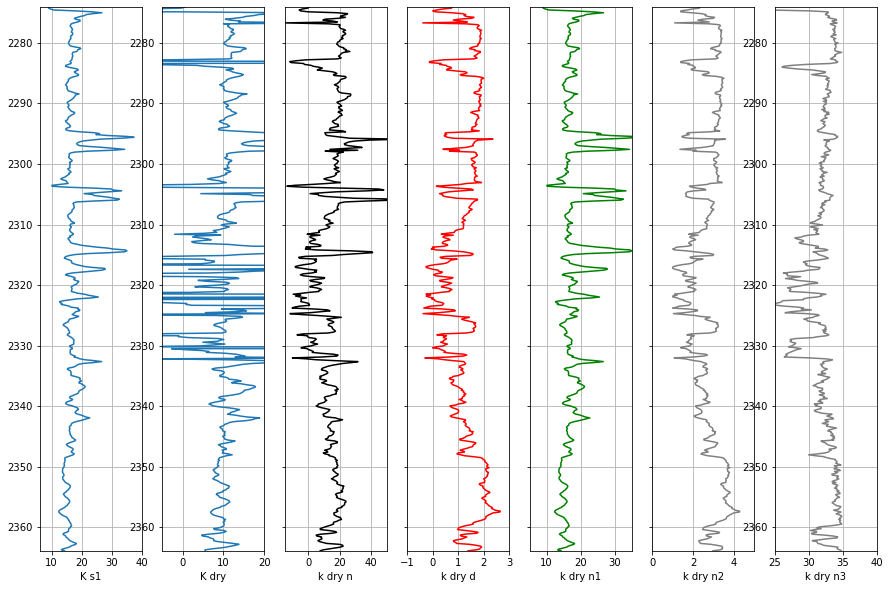

In [100]:
ztop=df.DEPTH.min(); zbot=df.DEPTH.max()
ll=df[(df.DEPTH>=ztop) & (df.DEPTH<=zbot)]

# cluster=np.repeat(np.expand_dims(ll['FACIES'].values,1), 100, 1)

f, ax = plt.subplots(nrows=1, ncols=7, figsize=(15, 10))

ax[0].plot(ll.k_s1, ll.DEPTH, label='k_s1')
ax[1].plot(ll.k_dry, ll.DEPTH, label='k_dry')
ax[2].plot(ll.k_dry_numer, ll.DEPTH, '-k', label='k_dry_numer')
ax[3].plot(ll.k_dry_denom, ll.DEPTH, '-r', label='k_dry_denom')
ax[4].plot(ll.k_dry_numer1, ll.DEPTH, '-g', label='k_dry_numer1')
ax[5].plot(ll.k_dry_numer2, ll.DEPTH, '-', color='0.5', label='k_dry_numer2')
ax[6].plot(ll.k_dry_numer3, ll.DEPTH, '-', color='0.5', label='k_dry_numer3')
# im=ax[6].imshow(cluster, interpolation='none', aspect='auto',cmap=cmap_facies,vmin=0,vmax=4)#4)

# cbar=plt.colorbar(im, ax=ax[6], aspect=20)
# cbar.set_label('0=undef,1=brine,2=oil,3=gas,4=shale')
# cbar.set_ticks(range(0,4+1)); cbar.set_ticklabels(range(0,4+1))
# cbar.set_label((6*' ').join(['shale', 'sand', 'interbed', 'limestone', 'salt']))#, 'shale']))
# cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')

for i in range(len(ax)):
    ax[i].set_ylim(ztop,zbot)
    ax[i].invert_yaxis()
    ax[i].grid()
    ax[i].locator_params(axis='x', nbins=4)
#ax[0].legend(fontsize='small', loc='lower right')

ax[0].set_xlabel("K s1"),      ax[0].set_xlim(6,40)
ax[1].set_xlabel("K dry"),     ax[1].set_xlim(-5, 20),     #ax[1].set_yticklabels([])
ax[2].set_xlabel("k dry n"),   ax[2].set_xlim(-15, 50), ax[2].set_yticklabels([])
ax[3].set_xlabel("k dry d"),   ax[3].set_xlim(-1, 3),  ax[3].set_yticklabels([])
ax[4].set_xlabel("k dry n1"),  ax[4].set_xlim(5, 35), ax[4].set_yticklabels([])
ax[5].set_xlabel("k dry n2"),  ax[5].set_xlim(0, 5),    ax[5].set_yticklabels([])
ax[6].set_xlabel('k dry n3'),  ax[6].set_xlim(25, 40),    ax[5].set_yticklabels([]);

(-1.0, 40.0)

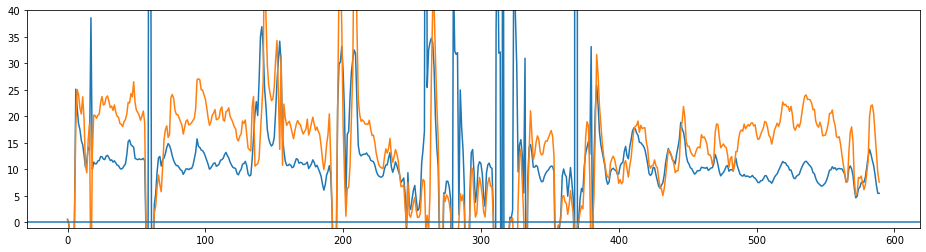

In [36]:
# PLOTTING K_DRY
plt.figure(figsize=(16,4))
plt.plot(kdry_arr)
plt.plot(kdry_numerator)
# plt.plot(kdry_denominator)
plt.axhline(y=0)
plt.ylim(-1, 40)

(9.0, 14.0)

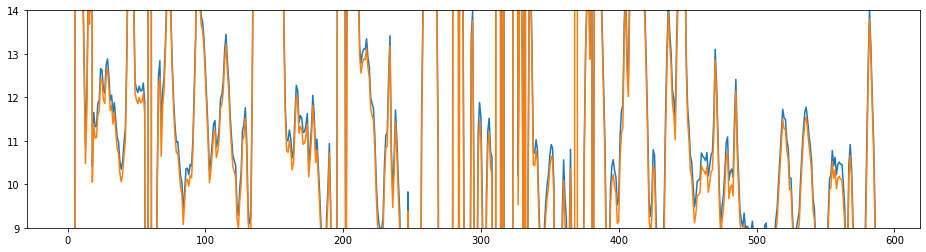

In [52]:
plt.figure(figsize=(16,4))
plt.plot(k_s2_arr)
plt.plot(kdry_arr)
plt.axhline(y=0)
plt.ylim(9, 14)

(-1.0, 40.0)

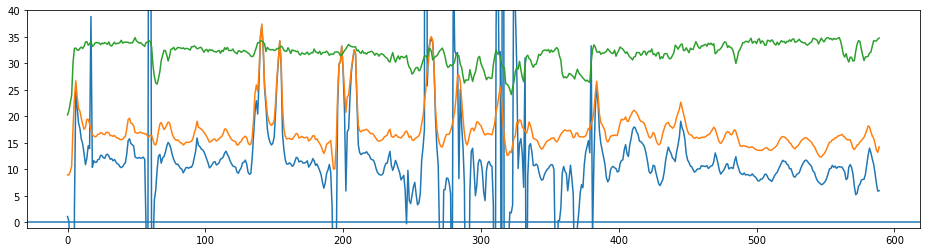

In [50]:
plt.figure(figsize=(16,4))

plt.plot(k0)
plt.plot(k_s2_arr)
plt.plot(k_s1_arr)

plt.axhline(y=0)
plt.ylim(-1, 40)

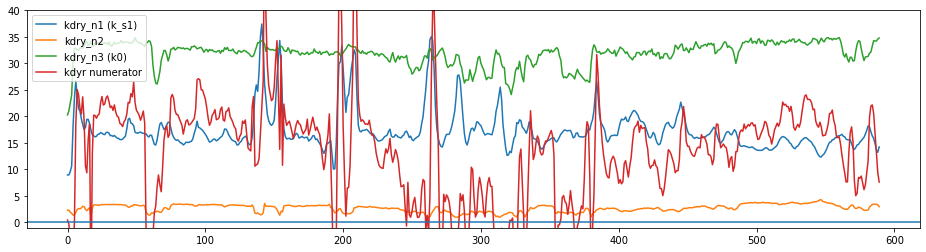

In [65]:
plt.figure(figsize=(16,4))

#plt.plot(k0, label='k0')

plt.plot(k_s1_arr, label='kdry_n1 (k_s1)')
plt.plot(kdry_numerator_2, label='kdry_n2')
plt.plot(kdry_numerator_3, label='kdry_n3 (k0)')
plt.plot(kdry_numerator, label='kdyr numerator')
#plt.plot(kdry_arr, label='kdry')

plt.axhline(y=0)
plt.ylim(-1, 40)
plt.legend()

(-1.0, 3.0)

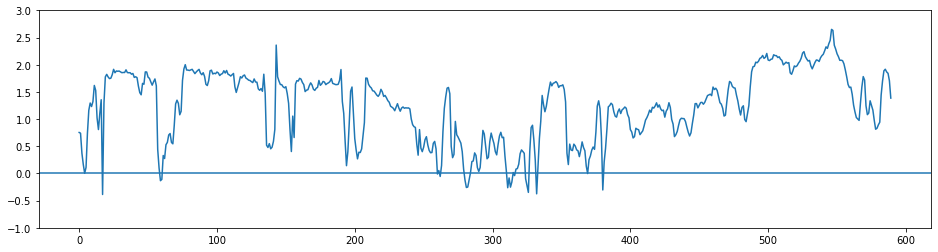

In [39]:
plt.figure(figsize=(16,4))
# plt.plot(kdry_arr)
# plt.plot(kdry_numerator)
plt.plot(kdry_denominator)
plt.axhline(y=0)
plt.ylim(-1, 3)

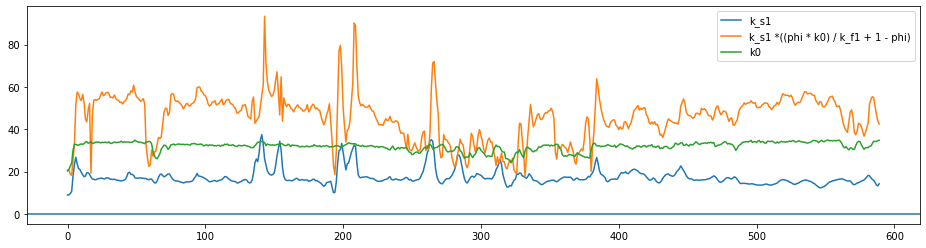

In [85]:
# where kdry_numerator_3 > kdry_numer_12, kdry is negative => k_s2 likely to be negative, => vp^2 is negative => ??

plt.figure(figsize=(16,4))
# plt.plot(kdry_arr)
# plt.plot(kdry_numerator)
plt.plot(k_s1_arr, label='k_s1')
plt.plot(kdry_numer_12, label=f'k_s1 *((phi * k0) / k_f1 + 1 - phi)')
plt.plot(kdry_numerator_3, label='k0')
plt.axhline(y=0)
#plt.ylim(-1, 3)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


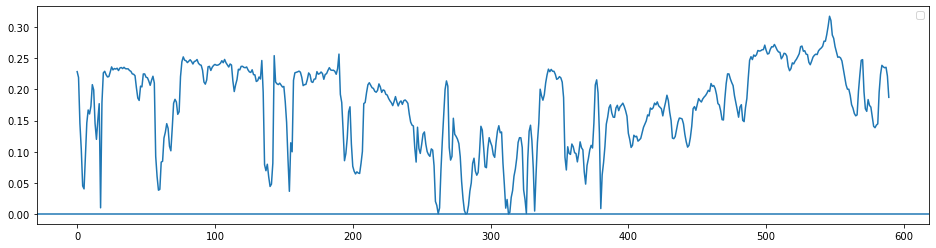

In [86]:
# POROSITY

plt.figure(figsize=(16,4))
# plt.plot(kdry_arr)
# plt.plot(kdry_numerator)
plt.plot(df.PHIE)
plt.axhline(y=0)
#plt.ylim(-1, 3)
plt.legend()

In [ ]:
vp_frm

In [ ]:
for i in range(0, len(df.VP)):

    # convert Vp,Vs from m/s to km/s for calculation
    vp1 = df.VP[i] / 1000.
    vs1 = df.VS[i] / 1000.
    rho1 = df.DEN[i]
    phi = df.PHIE[i]
    # k0 = k0[i]

    mu1 = rho1 * vs1 ** 2.
    k_s1 = rho1 * vp1 ** 2 - (4. / 3.) * mu1  # mu1 = rho1 * vs1**2
    

    # The dry rock bulk modulus
    kdry_numer = (k_s1 * ((phi * k0[i]) / k_f1 + 1 - phi) - k0[i])  #### is this the problem line ??????
    kdry_denom = ((phi * k0[i]) / k_f1 + (k_s1 / k0[i]) - 1 - phi)
    
    kdry_numer_1 = k_s1
    kdry_numer_2 = ((phi * k0[i]) / k_f1 + 1 - phi)
    kdry_numer_3 = k0[i]
    kdry_numer_all = kdry_numer_1 * kdry_numer_2 - kdry_numer_3                        
    
#     kdry = kdry_numer / kdry_denom
    kdry = (k_s1 * ((phi*k0[i])/k_f1+1-phi)-k0[i]) / ((phi*k0[i])/k_f1+(k_s1/k0[i])-1-phi)
    
    # Now we can apply Gassmann to get the new values
    k_s2_numer = kdry + (1 - (kdry / k0[i])) ** 2
    k_s2_denom = ((phi / k_f2) + ((1 - phi) / k0[i]) - (kdry / k0[i] ** 2))
#     k_s2 = k_s2_numer / k_s2_denom
    k_s2 = kdry + (1 - (kdry / k0[i])) ** 2 / ((phi / k_f2) + ((1 - phi) / k0[i]) - (kdry / k0[i] ** 2))
    
    rho2 = rho1 - phi * rho_f1 + phi * rho_f2
    
    mu2 = mu1
    vp2 = np.sqrt(((k_s2 + (4. / 3.) * mu2)) / rho2)    
    vs2 = np.sqrt((mu2 / rho2))
    

#     print(f"kdry_numer_all : {kdry_numer_all}")
#     print(f"vp1:      vs1:     rho1:    phi: \n{vp1, vs1, rho1, phi}")
#     print(f"mu1: {mu1}")
#     print(f"k_s1: {k_s1}")
    print(f"kdry_numer:                           {kdry_numer}")
    print(f"kdry_denom:                           {kdry_denom}")
    print("-"*20)    
    print(f"kdry(numerator pt1 (k_s1*)):          {kdry_numer_1}")
    print(f"kdry(((phi * k0) / k_f1 + 1 - phi)) : {kdry_numer_2}")
    print(f"kdry(numer1 * numer2):                {kdry_numer_1 * kdry_numer_2}")
    print(f"kdry(numerator pt2 (-k0)) :           {kdry_numer_3}")
    print("-"*56)    
    print(f"kdry:                                 {kdry}")
#     print("-"*56)
    print(f"k_s2_numer:                           {k_s2_numer}")
    print(f"k_s2_denom:                           {k_s2_denom}")
    print(f"k_s2:                                 {k_s2}")
#     print(f"rho2: {rho2}")
    print(f"sqrt(((k_s2+(4./3.)*mu2))/rho2):      {((k_s2 + (4. / 3.) * mu2)) / rho2}")
    print(f"vp2:                                  {vp2*1000:.1f}")
#     print(f"vs2: {vs2}")
    print("="*56)